In [1]:
import os
import pickle

import numpy as np
import torch

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, random_split
from torch.nn.functional import one_hot

from data_loaders.pulja_data_loader import PuljaDataLoader
from models._20220530_00 import UserModel
from models.utils import collate_fn

if torch.cuda.is_available():
    from torch.cuda import FloatTensor, LongTensor
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    from torch import FloatTensor, LongTensor

In [2]:
ckpt_path = "ckpts"
if not os.path.isdir(ckpt_path):
    os.mkdir(ckpt_path)

batch_size = 256
num_epochs = 100
train_ratio = 0.9

seq_len = 100

dim_v = 20

dataset = PuljaDataLoader(seq_len)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

model = UserModel(dataset.num_c, dataset.num_d, dim_v).to(device)

train_size = int(len(dataset) * train_ratio)
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(
    dataset, [train_size, test_size]
)

if os.path.exists(os.path.join(dataset.dataset_dir, "indices.pkl")):
    with open(os.path.join(dataset.dataset_dir, "indices.pkl"), "rb") as f:
        indices = pickle.load(f)
    train_dataset.indices = indices[0]
    test_dataset.indices = indices[1]
else:
    with open(os.path.join(dataset.dataset_dir, "indices.pkl"), "wb") as f:
        pickle.dump((train_dataset.indices, test_dataset.indices), f)


In [3]:
for d in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]:
    print(np.mean(
        (dataset.df[dataset.df["difficulty_cd"] == d]["isCorrect"] == "Y")
    ))

0.7915178629828761
0.7644189259195303
0.7025539179819519
0.6257541291662546
0.5188984881209503
0.4143646408839779
0.1


In [4]:
for d in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]:
    print(np.mean(
        (dataset.df[dataset.df["difficulty_cd"] == d]["isCorrect"] == "Y") & \
        (dataset.df[dataset.df["difficulty_cd"] == d]["duration"] <= dataset.difficulty2duration[d])
    ))

0.6583205787318656
0.6361595579347263
0.5688187403458649
0.47374146968648007
0.35295176385889127
0.26933701657458564
0.1


In [5]:
difficulty2duration = {
    1.0: 1.5,
    2.0: 2.0,
    3.0: 2.5,
    4.0: 2.5,
    5.0: 2.5,
    6.0: 3.0,
    7.0: 7.0,
}
for d in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]:
    print(np.mean(
        (dataset.df[dataset.df["difficulty_cd"] == d]["isCorrect"] == "Y") & \
        (dataset.df[dataset.df["difficulty_cd"] == d]["duration"] <= difficulty2duration[d] * 60)
    ))

0.6583205787318656
0.6361595579347263
0.5688187403458649
0.47374146968648007
0.35295176385889127
0.26933701657458564
0.1


In [6]:
model.load_state_dict(
    torch.load(
        os.path.join(
            os.path.join(
                ckpt_path, "_20220530_00"
            ),
            "model.ckpt"
        ),
        map_location=device
    )
)
model.eval()

UserModel(
  (D): Embedding(7, 1)
  (gru): GRU(40, 20, batch_first=True)
  (linear_1): Sequential(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=20, out_features=1, bias=True)
    (4): Dropout(p=0.5, inplace=False)
  )
  (linear_2): Sequential(
    (0): Linear(in_features=60, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=20, out_features=1, bias=True)
    (4): Dropout(p=0.5, inplace=False)
  )
)

In [7]:
####################################################################

# c_seq = np.array([[0, 0, 0] * 10])
# d_seq = np.array([[4, 6, 7] * 10]) - 1
# r_seq = np.array([[1, 1, 1] * 10])

# c_seq = np.array([[0] * 5])
# d_seq = np.array([[7] * 5]) - 1
# r_seq = np.array([[1] * 5])

##################################################

# c_seq = np.array([[0, 0, 0] * 10])
# d_seq = np.array([[4, 6, 7] * 10]) - 1
# r_seq = np.array([[1, 1, 0] * 10])

# c_seq = np.array([[0, 0] * 10])
# d_seq = np.array([[6, 7] * 10]) - 1
# r_seq = np.array([[1, 0] * 10])

##################################################

# c_seq = np.array([[0, 0, 0] * 10])
# d_seq = np.array([[4, 6, 5] * 10]) - 1
# r_seq = np.array([[1, 0, 1] * 10])

# c_seq = np.array([[0, 0] * 10])
# d_seq = np.array([[5, 6] * 10]) - 1
# r_seq = np.array([[1, 0] * 10])

##################################################

# c_seq = np.array([[0, 0, 0] * 10])
# d_seq = np.array([[4, 6, 5] * 10]) - 1
# r_seq = np.array([[1, 0, 0] * 10])

# c_seq = np.array([[0, 0] * 10])
# d_seq = np.array([[4, 5] * 10]) - 1
# r_seq = np.array([[1, 0] * 10])

##################################################

# c_seq = np.array([[0, 0, 0] * 10])
# d_seq = np.array([[4, 2, 3] * 10]) - 1
# r_seq = np.array([[0, 1, 1] * 10])

# c_seq = np.array([[0, 0] * 10])
# d_seq = np.array([[3, 4] * 10]) - 1
# r_seq = np.array([[1, 0] * 10])

##################################################

# c_seq = np.array([[0, 0, 0] * 10])
# d_seq = np.array([[4, 2, 3] * 10]) - 1
# r_seq = np.array([[0, 1, 0] * 10])

# c_seq = np.array([[0, 0] * 10])
# d_seq = np.array([[2, 3] * 10]) - 1
# r_seq = np.array([[1, 0] * 10])

##################################################

# c_seq = np.array([[0, 0, 0] * 10])
# d_seq = np.array([[4, 2, 1] * 10]) - 1
# r_seq = np.array([[0, 0, 1] * 10])

# c_seq = np.array([[0, 0] * 10])
# d_seq = np.array([[1, 2] * 10]) - 1
# r_seq = np.array([[1, 0] * 10])

##################################################

# c_seq = np.array([[0, 0, 0] * 10])
# d_seq = np.array([[4, 2, 1] * 10]) - 1
# r_seq = np.array([[0, 0, 0] * 10])

# c_seq = np.array([[0] * 5])
# d_seq = np.array([[1] * 5]) - 1
# r_seq = np.array([[0] * 5])

# c_seq = np.array([[0, 0] * 10])
# d_seq = np.array([[1, 1] * 10]) - 1
# r_seq = np.array([[1, 0] * 10])

####################################################################

c_seq = np.array([[0] * 7])
d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
r_seq = np.array([[1, 1, 1, 1, 1, 1, 1]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 1, 1, 1, 1, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 1, 1, 1, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 1, 1, 0, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 1, 0, 0, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 0, 0, 0, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 0, 0, 0, 0, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[0, 0, 0, 0, 0, 0, 0]])

####################################################################

# c_seq = np.array([[0] * 10])
# d_seq = np.array([[7] * 10]) - 1
# r_seq = np.array([[1] * 10])

alpha_seq, h_seq, C_seq = model(
    LongTensor(c_seq),
    LongTensor(d_seq),
    FloatTensor(r_seq),
)

sigmoid_alpha_seq = torch.sigmoid(alpha_seq).detach().cpu().numpy()

CQ_seq = torch.sigmoid(C_seq.squeeze() + alpha_seq.unsqueeze(-1)).detach().cpu().numpy()
C_seq = C_seq.squeeze().detach().cpu().numpy()

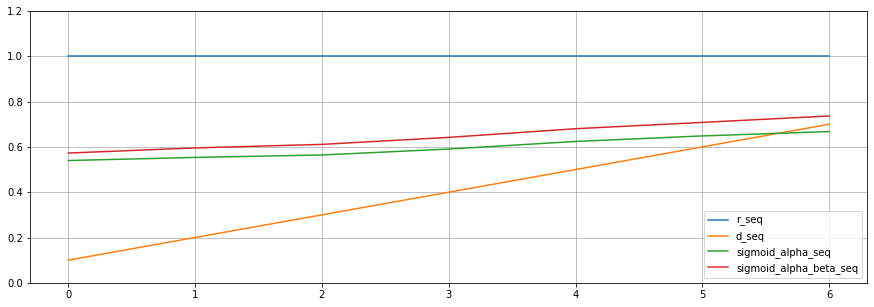

In [8]:
plt.figure(figsize=[15, 5], facecolor="white")
plt.plot(r_seq[0], label="r_seq")
plt.plot((d_seq[0] + 1) / 10, label="d_seq")
plt.plot(sigmoid_alpha_seq, label="sigmoid_alpha_seq")
plt.plot(CQ_seq.T[0], label="sigmoid_alpha_beta_seq")
# plt.plot(sigmoid_alpha_beta_gamma_seq, label="sigmoid_alpha_beta_gamma_seq")
# plt.plot(r_seq_ma, label="r_seq_ma")
plt.grid()
plt.ylim(0, 1.2)
plt.legend()
plt.show()

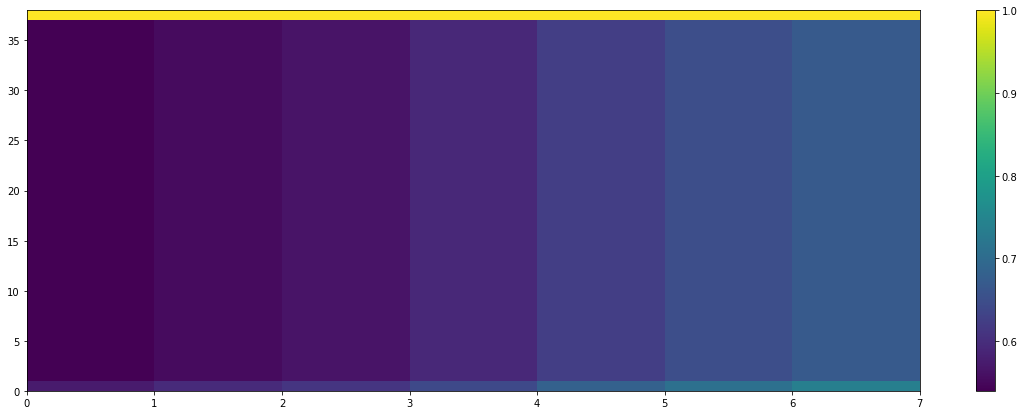

In [9]:
plt.figure(figsize=[20, 7], facecolor="white")
temp = np.concatenate([CQ_seq.T, r_seq], axis=0)
plt.pcolormesh(temp)
plt.colorbar()
plt.show()

# plt.figure(figsize=[15, 0.5], facecolor="white")
# plt.pcolormesh(r_seq)
# plt.show()

In [10]:
CQ_seq[0], CQ_seq[-1], c_seq, d_seq

(array([0.5728043 , 0.53983444, 0.53983444, 0.53983444, 0.53983444,
        0.53983444, 0.53983444, 0.53983444, 0.53983444, 0.53983444,
        0.53983444, 0.53983444, 0.53983444, 0.53983444, 0.53983444,
        0.53983444, 0.53983444, 0.53983444, 0.53983444, 0.53983444,
        0.53983444, 0.53983444, 0.53983444, 0.53983444, 0.53983444,
        0.53983444, 0.53983444, 0.53983444, 0.53983444, 0.53983444,
        0.53983444, 0.53983444, 0.53983444, 0.53983444, 0.53983444,
        0.53983444, 0.53983444], dtype=float32),
 array([0.7364541, 0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918,
        0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918,
        0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918,
        0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918,
        0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918,
        0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918, 0.6676918,
        0.6676918], dtype=float

In [11]:
model.D.weight

Parameter containing:
tensor([[-0.7354],
        [-0.5433],
        [-0.2500],
        [ 0.2259],
        [ 0.8020],
        [ 1.2470],
        [ 2.4088]], requires_grad=True)